   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.6 MB/s eta 0:00:00
Para um indivíduo com 32 anos e estado de saúde 0.7, o prêmio calculado é: 26.55


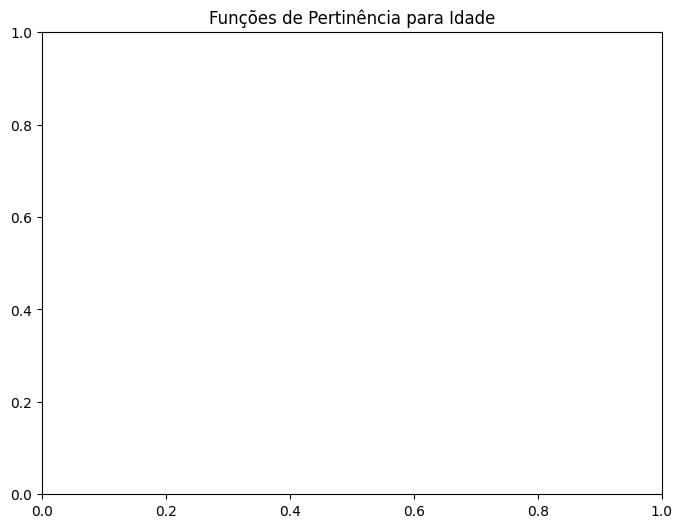

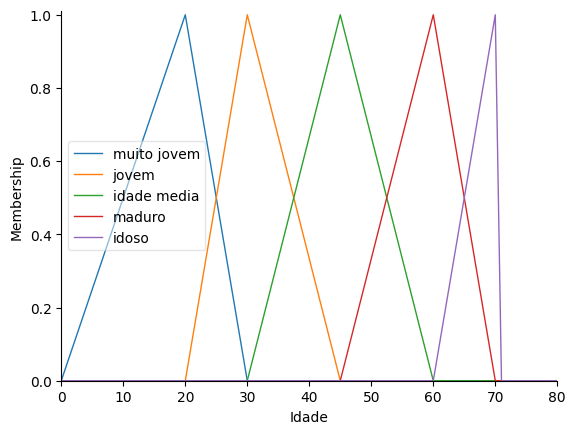

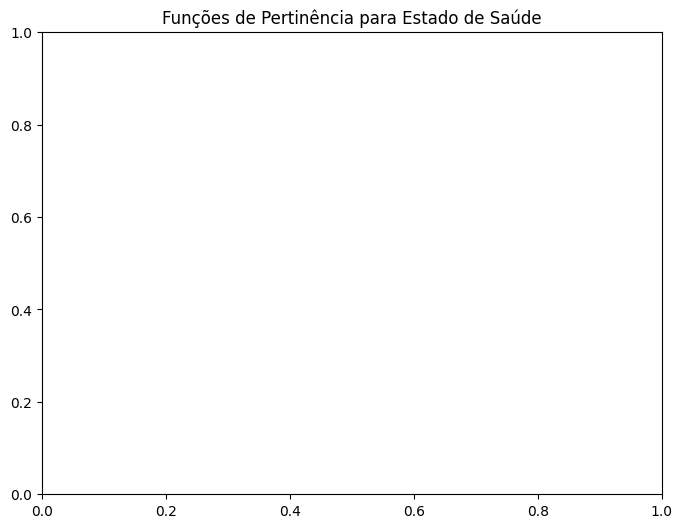

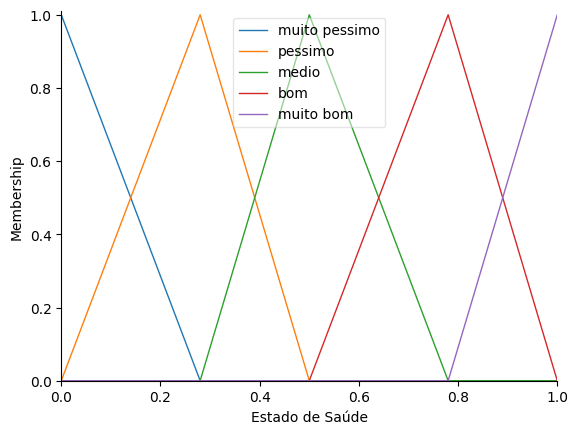

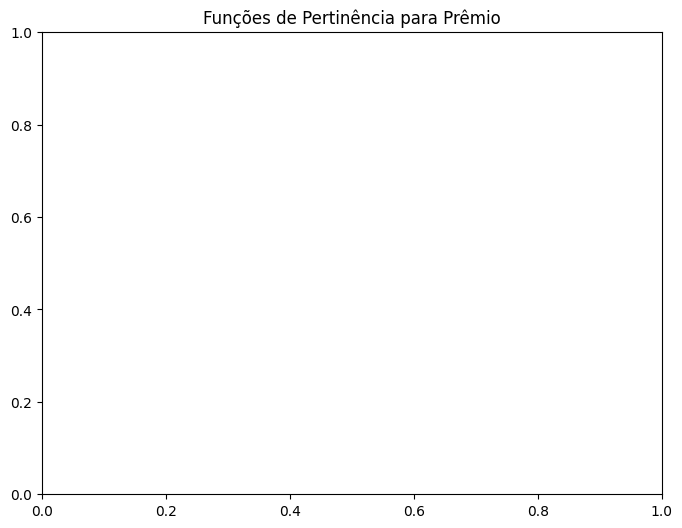

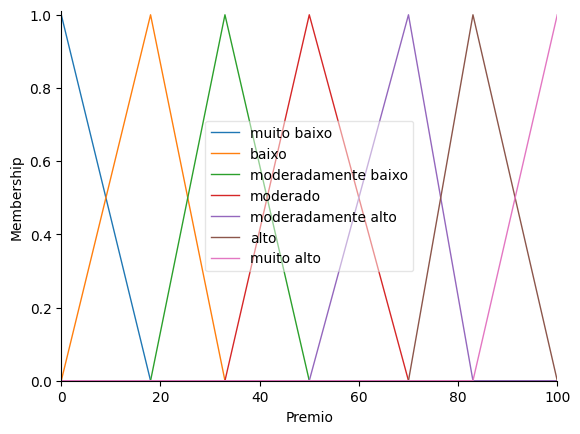

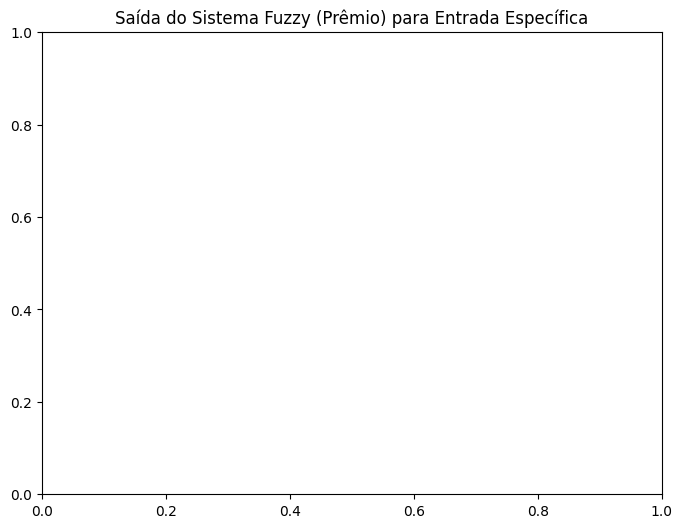

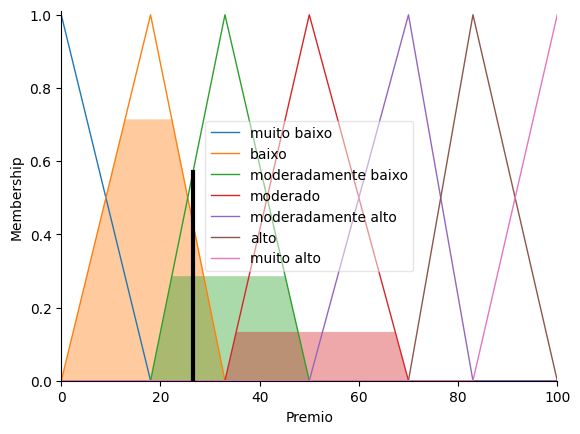

In [1]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definir as Variáveis de Entrada e Saída

# Universos de discurso
idade_universo = np.arange(0, 81, 1)  # Idade de 0 a 80 anos
estado_saude_universo = np.arange(0, 1.01, 0.01)  # Estado de saúde de 0 a 1
premio_universo = np.arange(0, 101, 1)  # Prêmio de 0 a 100

# Variáveis fuzzy
idade = ctrl.Antecedent(idade_universo, 'Idade')
estado_saude = ctrl.Antecedent(estado_saude_universo, 'Estado de Saúde')
premio = ctrl.Consequent(premio_universo, 'Premio')

# 2. Definir os Conjuntos Fuzzy

# Idade
idade['muito jovem'] = fuzz.trimf(idade.universe, [0, 20, 30])
idade['jovem'] = fuzz.trimf(idade.universe, [20, 30, 45])
idade['idade media'] = fuzz.trimf(idade.universe, [30, 45, 60])
idade['maduro'] = fuzz.trimf(idade.universe, [45, 60, 70])
idade['idoso'] = fuzz.trimf(idade.universe, [60, 70, 70])

# Estado de Saúde
estado_saude['muito pessimo'] = fuzz.trimf(estado_saude.universe, [0, 0, 0.28])
estado_saude['pessimo'] = fuzz.trimf(estado_saude.universe, [0, 0.28, 0.5])
estado_saude['medio'] = fuzz.trimf(estado_saude.universe, [0.28, 0.5, 0.78])
estado_saude['bom'] = fuzz.trimf(estado_saude.universe, [0.5, 0.78, 1])
estado_saude['muito bom'] = fuzz.trimf(estado_saude.universe, [0.78, 1, 1])

# Prêmio
premio['muito baixo'] = fuzz.trimf(premio.universe, [0, 0, 18])
premio['baixo'] = fuzz.trimf(premio.universe, [0, 18, 33])
premio['moderadamente baixo'] = fuzz.trimf(premio.universe, [18, 33, 50])
premio['moderado'] = fuzz.trimf(premio.universe, [33, 50, 70])
premio['moderadamente alto'] = fuzz.trimf(premio.universe, [50, 70, 83])
premio['alto'] = fuzz.trimf(premio.universe, [70, 83, 100])
premio['muito alto'] = fuzz.trimf(premio.universe, [83, 100, 100])

# 3. Definir as Regras Fuzzy

# Regras baseadas na tabela fornecida
regra1 = ctrl.Rule(idade['muito jovem'] & estado_saude['muito pessimo'], premio['moderado'])
regra2 = ctrl.Rule(idade['muito jovem'] & estado_saude['pessimo'], premio['moderadamente baixo'])
regra3 = ctrl.Rule(idade['muito jovem'] & estado_saude['medio'], premio['moderadamente baixo'])
regra4 = ctrl.Rule(idade['muito jovem'] & estado_saude['bom'], premio['muito baixo'])
regra5 = ctrl.Rule(idade['muito jovem'] & estado_saude['muito bom'], premio['muito baixo'])

regra6 = ctrl.Rule(idade['jovem'] & estado_saude['muito pessimo'], premio['alto'])
regra7 = ctrl.Rule(idade['jovem'] & estado_saude['pessimo'], premio['moderado'])
regra8 = ctrl.Rule(idade['jovem'] & estado_saude['medio'], premio['moderadamente baixo'])
regra9 = ctrl.Rule(idade['jovem'] & estado_saude['bom'], premio['baixo'])
regra10 = ctrl.Rule(idade['jovem'] & estado_saude['muito bom'], premio['baixo'])

regra11 = ctrl.Rule(idade['idade media'] & estado_saude['muito pessimo'], premio['moderadamente alto'])
regra12 = ctrl.Rule(idade['idade media'] & estado_saude['pessimo'], premio['moderadamente alto'])
regra13 = ctrl.Rule(idade['idade media'] & estado_saude['medio'], premio['moderado'])
regra14 = ctrl.Rule(idade['idade media'] & estado_saude['bom'], premio['moderadamente baixo'])
regra15 = ctrl.Rule(idade['idade media'] & estado_saude['muito bom'], premio['moderadamente baixo'])

regra16 = ctrl.Rule(idade['maduro'] & estado_saude['muito pessimo'], premio['alto'])
regra17 = ctrl.Rule(idade['maduro'] & estado_saude['pessimo'], premio['moderadamente alto'])
regra18 = ctrl.Rule(idade['maduro'] & estado_saude['medio'], premio['moderadamente alto'])
regra19 = ctrl.Rule(idade['maduro'] & estado_saude['bom'], premio['moderado'])
regra20 = ctrl.Rule(idade['maduro'] & estado_saude['muito bom'], premio['moderadamente baixo'])

regra21 = ctrl.Rule(idade['idoso'] & estado_saude['muito pessimo'], premio['muito alto'])
regra22 = ctrl.Rule(idade['idoso'] & estado_saude['pessimo'], premio['alto'])
regra23 = ctrl.Rule(idade['idoso'] & estado_saude['medio'], premio['alto'])
regra24 = ctrl.Rule(idade['idoso'] & estado_saude['bom'], premio['moderadamente alto'])
regra25 = ctrl.Rule(idade['idoso'] & estado_saude['muito bom'], premio['moderado'])

# 4. Criar o Sistema de Controle Fuzzy

premio_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8,
                                 regra9, regra10, regra11, regra12, regra13, regra14, regra15,
                                 regra16, regra17, regra18, regra19, regra20, regra21, regra22,
                                 regra23, regra24, regra25])
premio_simulador = ctrl.ControlSystemSimulation(premio_ctrl)

# 5. Calcular o Prêmio para um Indivíduo Específico

# Entrada: idade = 32, estado_saude = 0.7
premio_simulador.input['Idade'] = 32
premio_simulador.input['Estado de Saúde'] = 0.7
premio_simulador.compute()

# Exibir o resultado
print(f"Para um indivíduo com 32 anos e estado de saúde 0.7, o prêmio calculado é: {premio_simulador.output['Premio']:.2f}")

# 6. Visualizar os Conjuntos Fuzzy (Opcional)

# Plotar as funções de pertinência para Idade
plt.figure(figsize=(8, 6))
plt.title('Funções de Pertinência para Idade')
idade.view()
plt.show()

# Plotar as funções de pertinência para Estado de Saúde
plt.figure(figsize=(8, 6))
plt.title('Funções de Pertinência para Estado de Saúde')
estado_saude.view()
plt.show()

# Plotar as funções de pertinência para Prêmio
plt.figure(figsize=(8, 6))
plt.title('Funções de Pertinência para Prêmio')
premio.view()
plt.show()

# Plotar a saída do sistema fuzzy (Premio) para o caso específico
plt.figure(figsize=(8, 6))
plt.title('Saída do Sistema Fuzzy (Prêmio) para Entrada Específica')
premio.view(sim=premio_simulador)
plt.show()